# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator  # Import MaxNLocator for setting tick marks

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 3 decimal points
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Library to split data
from sklearn.model_selection import train_test_split
# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSFoundations/Project/Project 2 Classification/ExtraaLearn.csv')
df_original = df.copy()


## Data Overview

In [4]:
#Data shape.
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")
print(f'There are {df.duplicated().sum()} total duplicate rows.' ) #checking for duplicates.
print("--" *50,'\n')

#Data Info
print(f'Variables names, none missing count, and their data type:\n')
print(df.info())
print("--" *50,'\n')

#Random sample of 5 observations
print('Sample of dataframe.')
df.sample(5)

There are 4612 rows and 15 columns in the dataset.
There are 0 total duplicate rows.
---------------------------------------------------------------------------------------------------- 

Variables names, none missing count, and their data type:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
1457,EXT1458,28,Professional,Mobile App,High,4,642,2.166,Email Activity,No,No,No,No,No,0
417,EXT418,59,Professional,Website,High,14,1799,5.301,Email Activity,No,No,No,No,No,1
1723,EXT1724,58,Professional,Website,Medium,5,53,5.577,Email Activity,Yes,No,No,No,No,0
3446,EXT3447,60,Professional,Website,High,6,419,2.208,Phone Activity,No,No,No,Yes,No,1
1595,EXT1596,46,Professional,Mobile App,Medium,2,2192,3.293,Email Activity,No,No,No,No,No,0


In [5]:
#Printing number of missing by variable.
print(f'Number Missing by variable:\n{df.isnull().sum()}\n')
print("--" *50,'\n')
df.columns != "ID"

object_columns = df.columns[df.dtypes=='object']
object_columns = object_columns[object_columns!='ID']

#printing a count of each unique value by column.
print('Count of each Unique Value')
for col in object_columns:
  ccount = df[col].value_counts()
  print(ccount)
  print()
print("--" *50,'\n')

#printing a percent of each unique value by column.
print('Percent of each Unique Value')
for col in object_columns:
  ccount = df[col].value_counts(normalize=True,dropna=False)
  print(ccount)
  print()
print("--" *50,'\n')

Number Missing by variable:
ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

---------------------------------------------------------------------------------------------------- 

Count of each Unique Value
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64

first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64

profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64

last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64

print_media_type1
No     

In [6]:
df.describe().T #5 number summary of numerical variables


,count,mean,std,min,25%,50%,75%,max
age,4612.000,46.201,13.161,18.000,36.000,51.000,57.000,63.000
website_visits,4612.000,3.567,2.829,0.000,2.000,3.000,5.000,30.000
time_spent_on_website,4612.000,724.011,743.829,0.000,148.750,376.000,1336.750,2537.000
page_views_per_visit,4612.000,3.026,1.968,0.000,2.078,2.792,3.756,18.434
status,4612.000,0.299,0.458,0.000,0.000,0.000,1.000,1.000


The 5-number summaries reveal nothing unexpected; all features exhibit a wide range, especially 'age' and 'time spent on website'. However, a closer examination of the minimum values, particularly the occurrences of 0 for website visits, is warranted to ensure no discrepancies accross similar features.

In [7]:
#exploring 0 values
df.loc[(df.website_visits==0) & (df.page_views_per_visit !=0), 'ID'].count() #0 observations as expected
print(f"\nThe number of observations showing 'website' interaction but showing 0 minutes spent on website is {df.loc[((df.first_interaction=='Website') | (df.last_activity=='Website_Activity')) & (df.time_spent_on_website ==0), 'ID'].count()}")
#removing observations with potential errors.
rm = df.loc[((df.first_interaction=='Website') | (df.last_activity=='Website_Activity')) & (df.time_spent_on_website == 0)].index #indicies with errors
df.drop(rm, inplace=True) #removing observations
df.reset_index(drop=True, inplace=True)# Reindex the DataFrame
df.describe().T #5 number summary after data cleaning



The number of observations showing 'website' interaction but showing 0 minutes spent on website is 100


,count,mean,std,min,25%,50%,75%,max
age,4512.000,46.189,13.155,18.000,36.000,51.000,57.000,63.000
website_visits,4512.000,3.646,2.809,0.000,2.000,3.000,5.000,30.000
time_spent_on_website,4512.000,740.058,744.089,0.000,176.000,384.500,1368.750,2537.000
page_views_per_visit,4512.000,3.093,1.937,0.000,2.097,2.912,3.772,18.434
status,4512.000,0.298,0.457,0.000,0.000,0.000,1.000,1.000


####Observations:
There are no issues with dimensionality. Despite the large number of
observations (4612), the dataset contains a relatively small number of variables — 14, or 17 if dummy variables are applied.

There are no missing values but several(100) observations show no website visits or time spent on website but also shows there first or last interaction to be 'website'. This could be a potential labeling error that should be discussed with data manager. Since it is a relatively small sample of observations, these values will be removed until this issue is addressed.

Most variables are of the object data type with a boolean structure, making it a good canidate for applying a decision tree algorithm. Overall, the data appears to be complete with minimal/no data cleaning required.




## Exploratory Data Analysis (EDA)


**Client Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

###Univariate Exploration


####Continuous Variables


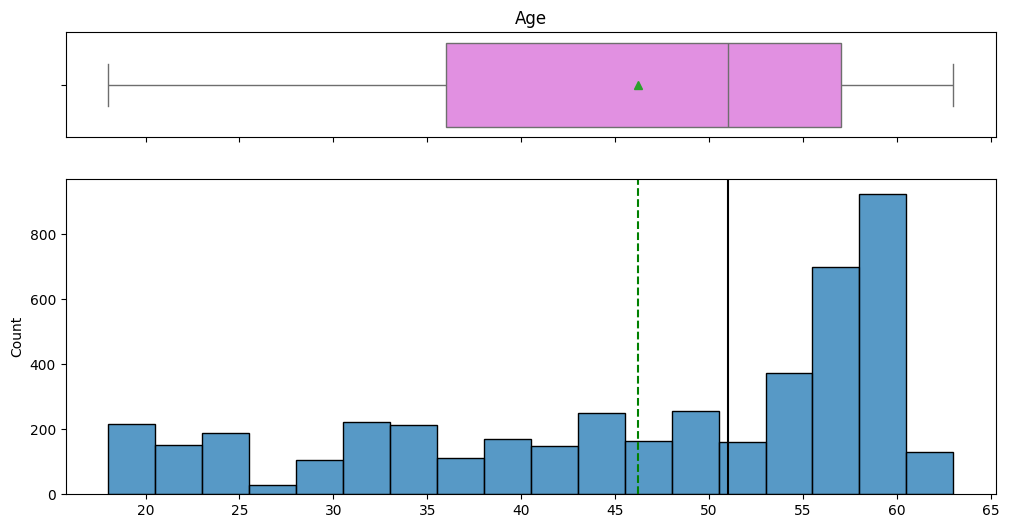

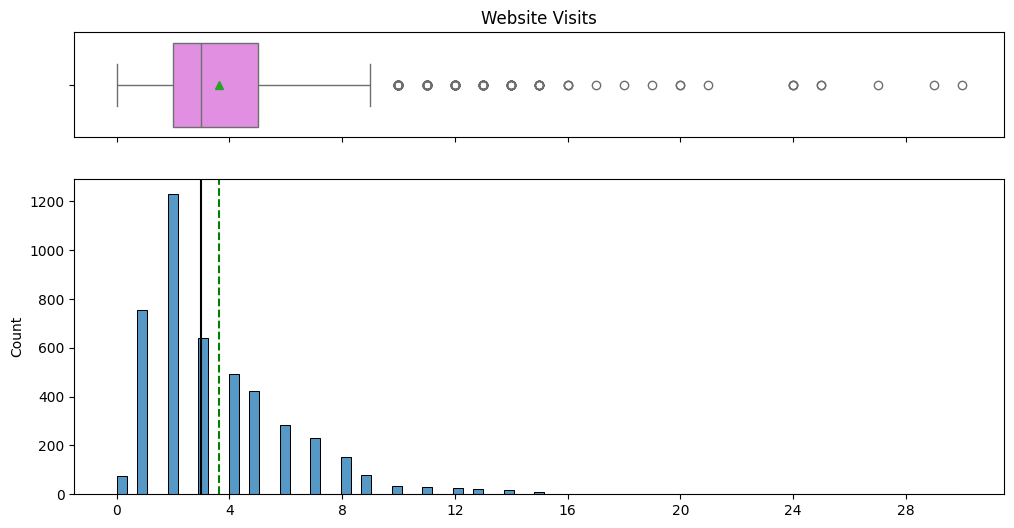

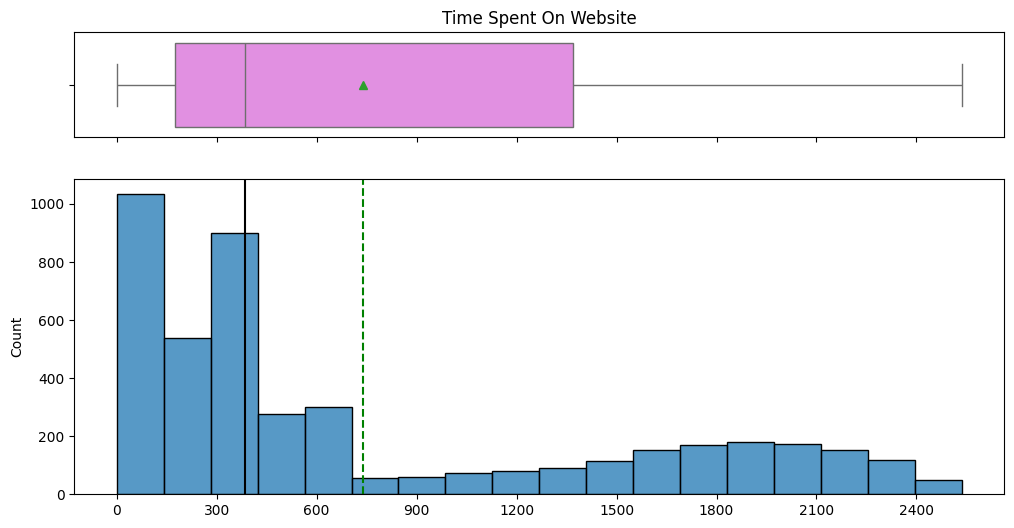

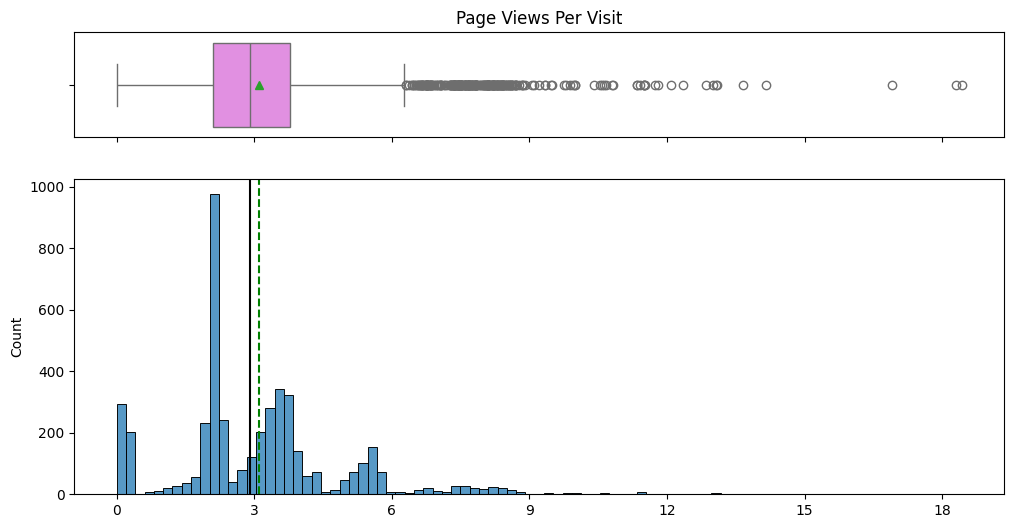

In [8]:
# Function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(12, 6), kde=False, bins=None, palette =None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,


    )  # Creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette=palette
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, palette=palette
        )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    # Capitalize each word and join with space for x-axis label
    title = ' '.join([word.capitalize() for word in feature.split('_')])
    ax_box2.set_title(title)
    ax_hist2.set_xlabel("")
    ax_hist2.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure whole number tick marks
    plt.show()


# Univariate Exploration
exclude = ["ID", 'status']
in_col = [col for col in df.columns if col not in exclude]  # excluding ID and response columns from visuals
palette = sns.color_palette("deep")  # setting palette for colorblindness
numerical_cols = df[in_col].select_dtypes(include=['int64', 'float64']).columns  # listing numerical columns


for col in numerical_cols:
    histogram_boxplot(df, col, palette=palette)
    print()


####Observations
**Age**
* Strong left skew with median age around 51.
* Ages range from 18 to 63.
* No apparent outliers.
* Peak age of leads is around 60.

**Website Visits**
* Slight right skew with median of 4 website visits.
* Several apparent outliers maxing out at 30 visits.

**Time on Website**
* Distribution is multimodal with a right skew.
* Median time is 376 minutes, mean is 724.
* Minutes peak around 0-150 min, 300-450 min, and around 1800 min.

**Page Views Per Visit**
* Distribution is multimodal with peaks around 1, 2.5, 4, and 5.5.
* Both average measures are around 3 pages.
* Strong indication of many outliers.

Although several variables indicate the presence of outliers and skewness, decision trees are robust to both of these potential issues, and thus no adjustments are necessary. If a different model is to be explored, outliers and distributions should be examined.




####Categorical Variables


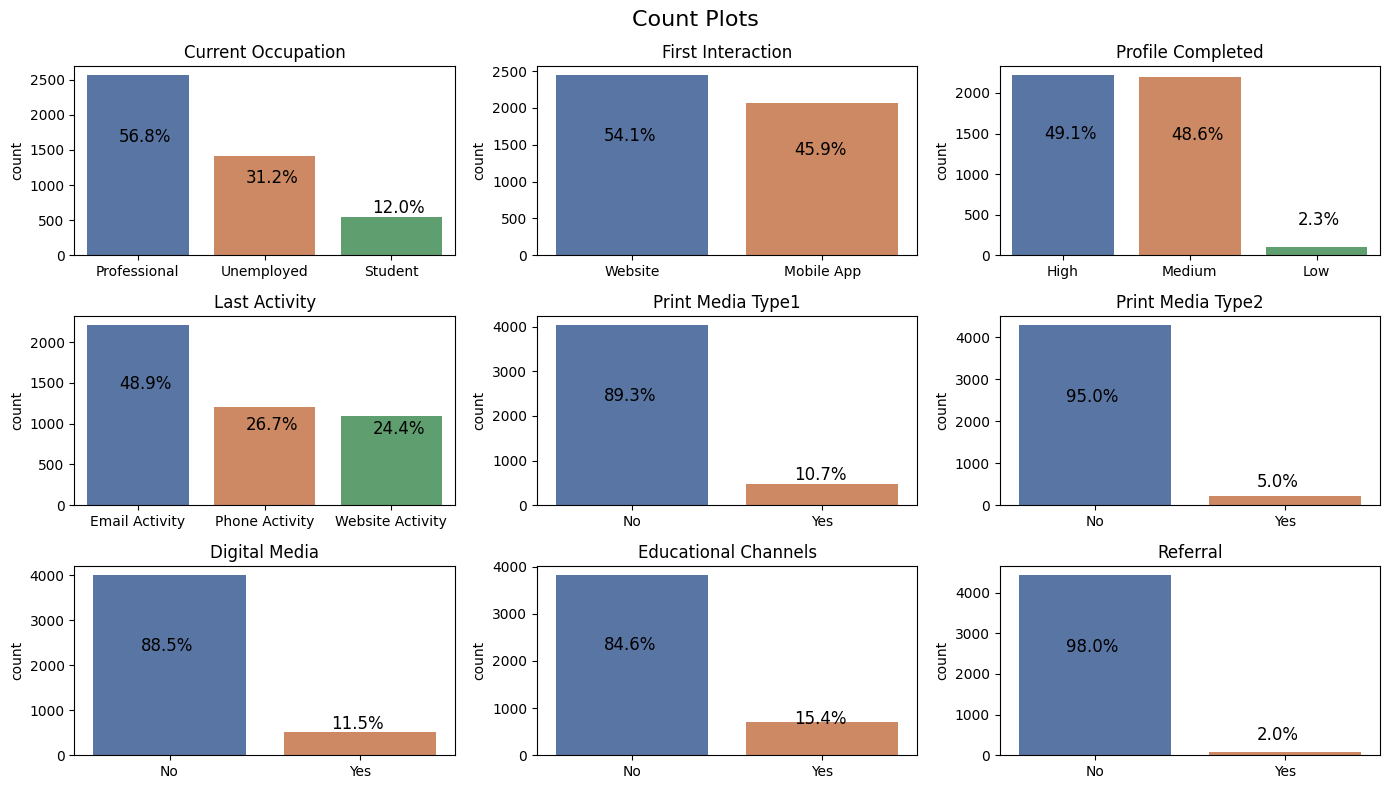

In [9]:
# Countplots for Categorical Variables
categorical_cols = df[in_col].select_dtypes(include=['object']).columns
# Ensure that the number of columns is an integer
num_rows = 3
num_columns = len(categorical_cols) // num_rows  # Use integer division

fig, axes = plt.subplots(num_rows, num_columns, figsize=(14, 8))  # Create subplots

fig.suptitle('Count Plots', fontsize=16)  # Set the main title for the entire figure

for i, col in enumerate(categorical_cols):
    row_index = i // num_columns
    col_index = i % num_columns
    ax = sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[row_index, col_index], palette=palette)
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_xlabel('')
    label = ' '.join([word.capitalize() for word in col.split('_')])
    axes[row_index, col_index].set_title(label)

    # Add percentage labels
    total = len(df[col])  # Total number of observations
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.15  # x-coordinate of the label
        y = p.get_y() + p.get_height()/2+325  # y-coordinate of the label
        ax.annotate(percentage, (x, y), size=12, color='black')  # Annotate the percentage

plt.tight_layout()
plt.show()


#### Observations
Many of our categorical features exhibit significant imbalances in responses, particularly referral, print media type2, and profile complete. This imbalance could potentially introduce challenges during the model-building process and warrants further investigation.

The binary nature of several features makes them well-suited for decision tree models. Given the imbalanced nature of certain features, it's crucial to delve deeper into their distribution and potential impact on model performance. Imbalanced features may lead to biased predictions and hinder the model's ability to generalize effectively.

Therefore, it's advisable to explore strategies for addressing class imbalance, such as resampling techniques or adjusting class weights during model training.

### Multivariate Analysis


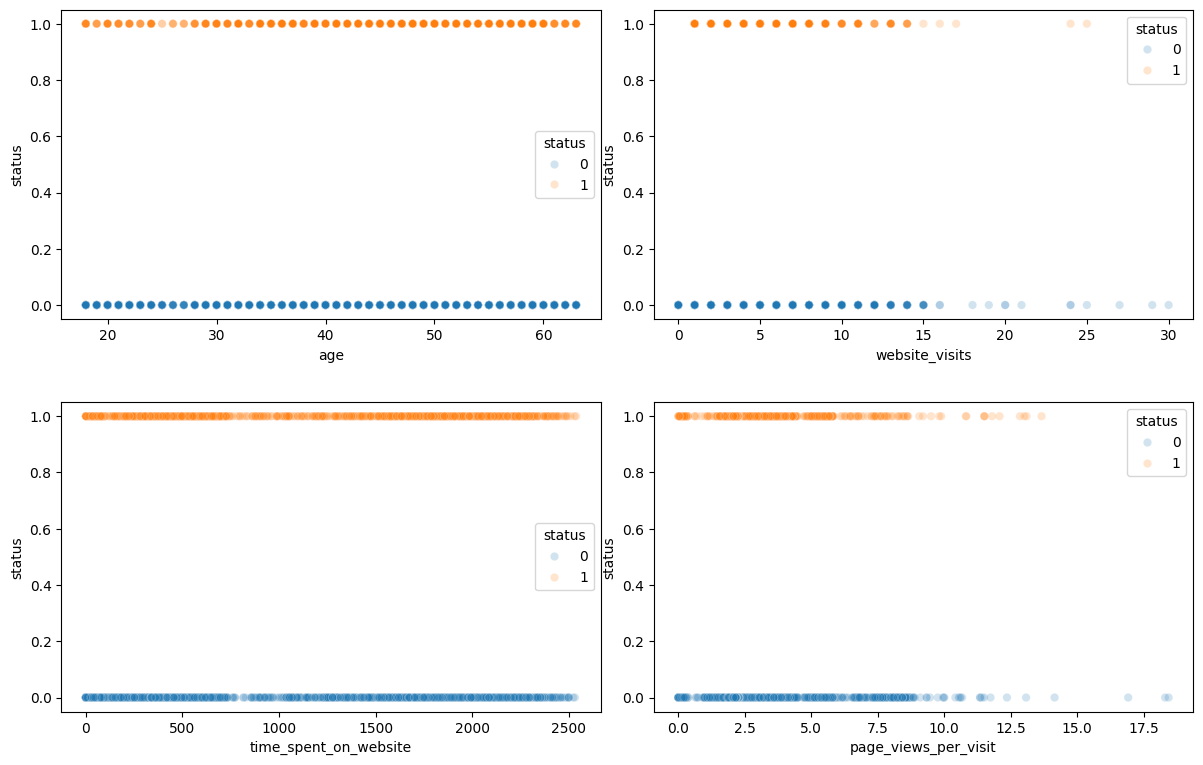

In [10]:
numerical_cols = df[in_col].select_dtypes(include=['int64', 'float64']).columns  # listing numerical columns

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 2

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to simplify iteration
axes = axes.flatten()

# Iterate over numerical columns and create scatter plots
for i, col in enumerate(numerical_cols[:num_rows * num_cols]):
    sns.scatterplot(data=df, y='status', x=col, hue='status', alpha=0.2, ax=axes[i])

plt.subplots_adjust(hspace=10.5)
plt.tight_layout()  # Adjust layout
plt.show()

####Observations
No clear linear relationship between status and any continuous variables. Website visits may show a slight relationship with status.

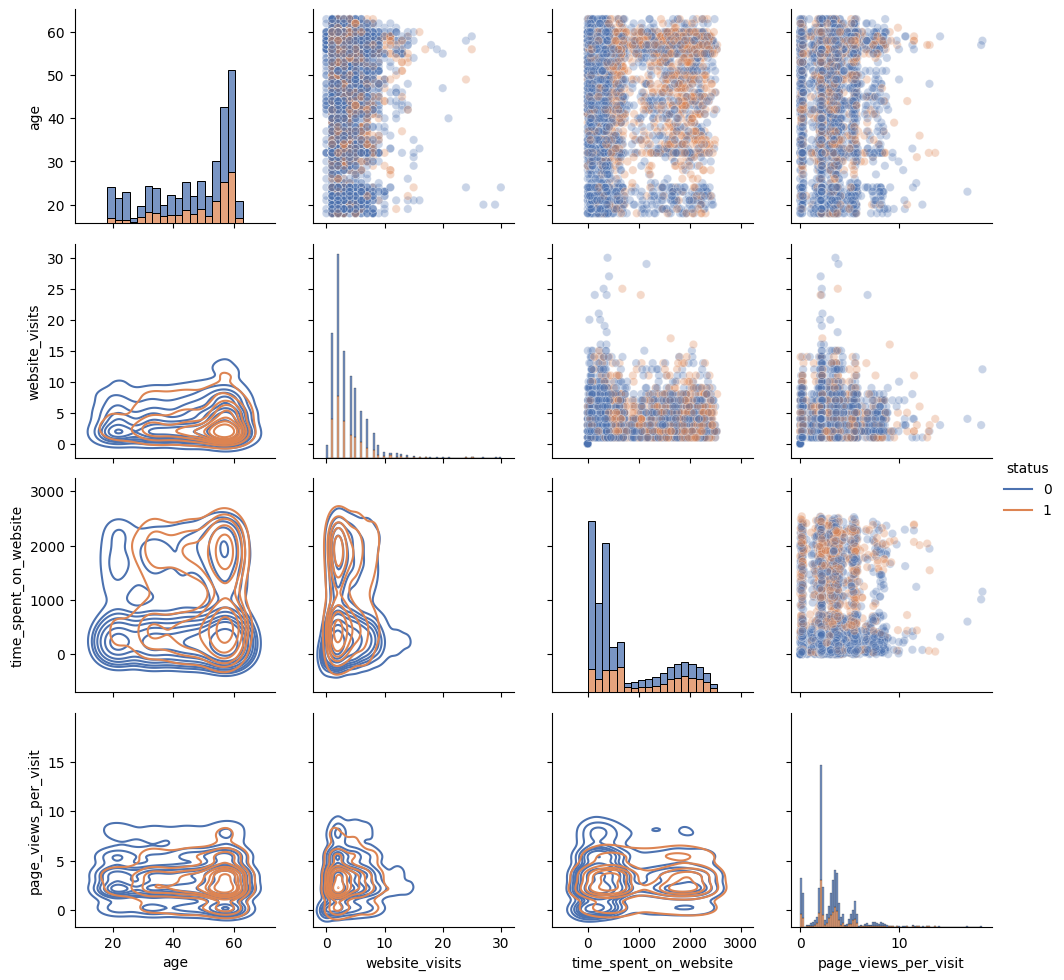

In [12]:
exclude = ["ID"]
in_col = [col for col in df.columns if col not in exclude]  # excluding ID

g = sns.PairGrid(df[in_col], hue='status', palette=palette) # sets up plot layout.
g.map_diag(sns.histplot, multiple="stack") #assigns histograms to diagonal
g.map_upper(sns.scatterplot, alpha = .3) #scatterplots on the up half.
g.map_lower(sns.kdeplot)#density plots on the lower half.
g.add_legend()

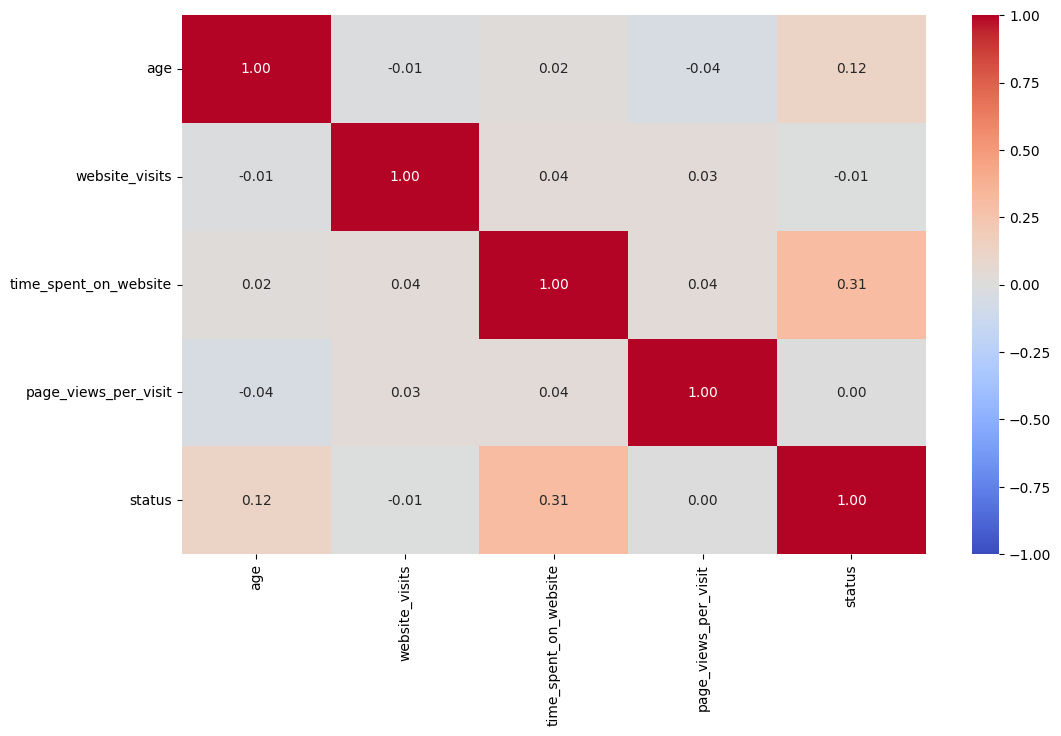

In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns  # listing numerical columns

#Correlation Heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(df[numerical_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='coolwarm')
plt.show()

#### Observations
There doesn't appear to be any strong correlations between variables with each other or with status.  However, there does appear to be some informative  threshold splits, particularly with age and time spent on website. This can be observed in both the scatterplot and at the slightly better correlations.

In [14]:
# Defining the stacked_barplot() function
def stacked_barplot(data, var, res, figsize=(10, 6), palette=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()

    (pd.crosstab(data[var], data[res], normalize='index') * 100).plot(kind='bar', stacked=True, color=palette, ax=ax)
    ax.legend(loc="lower right")
    ax.set_ylabel(res)
    ax.set_title(var)
    return ax

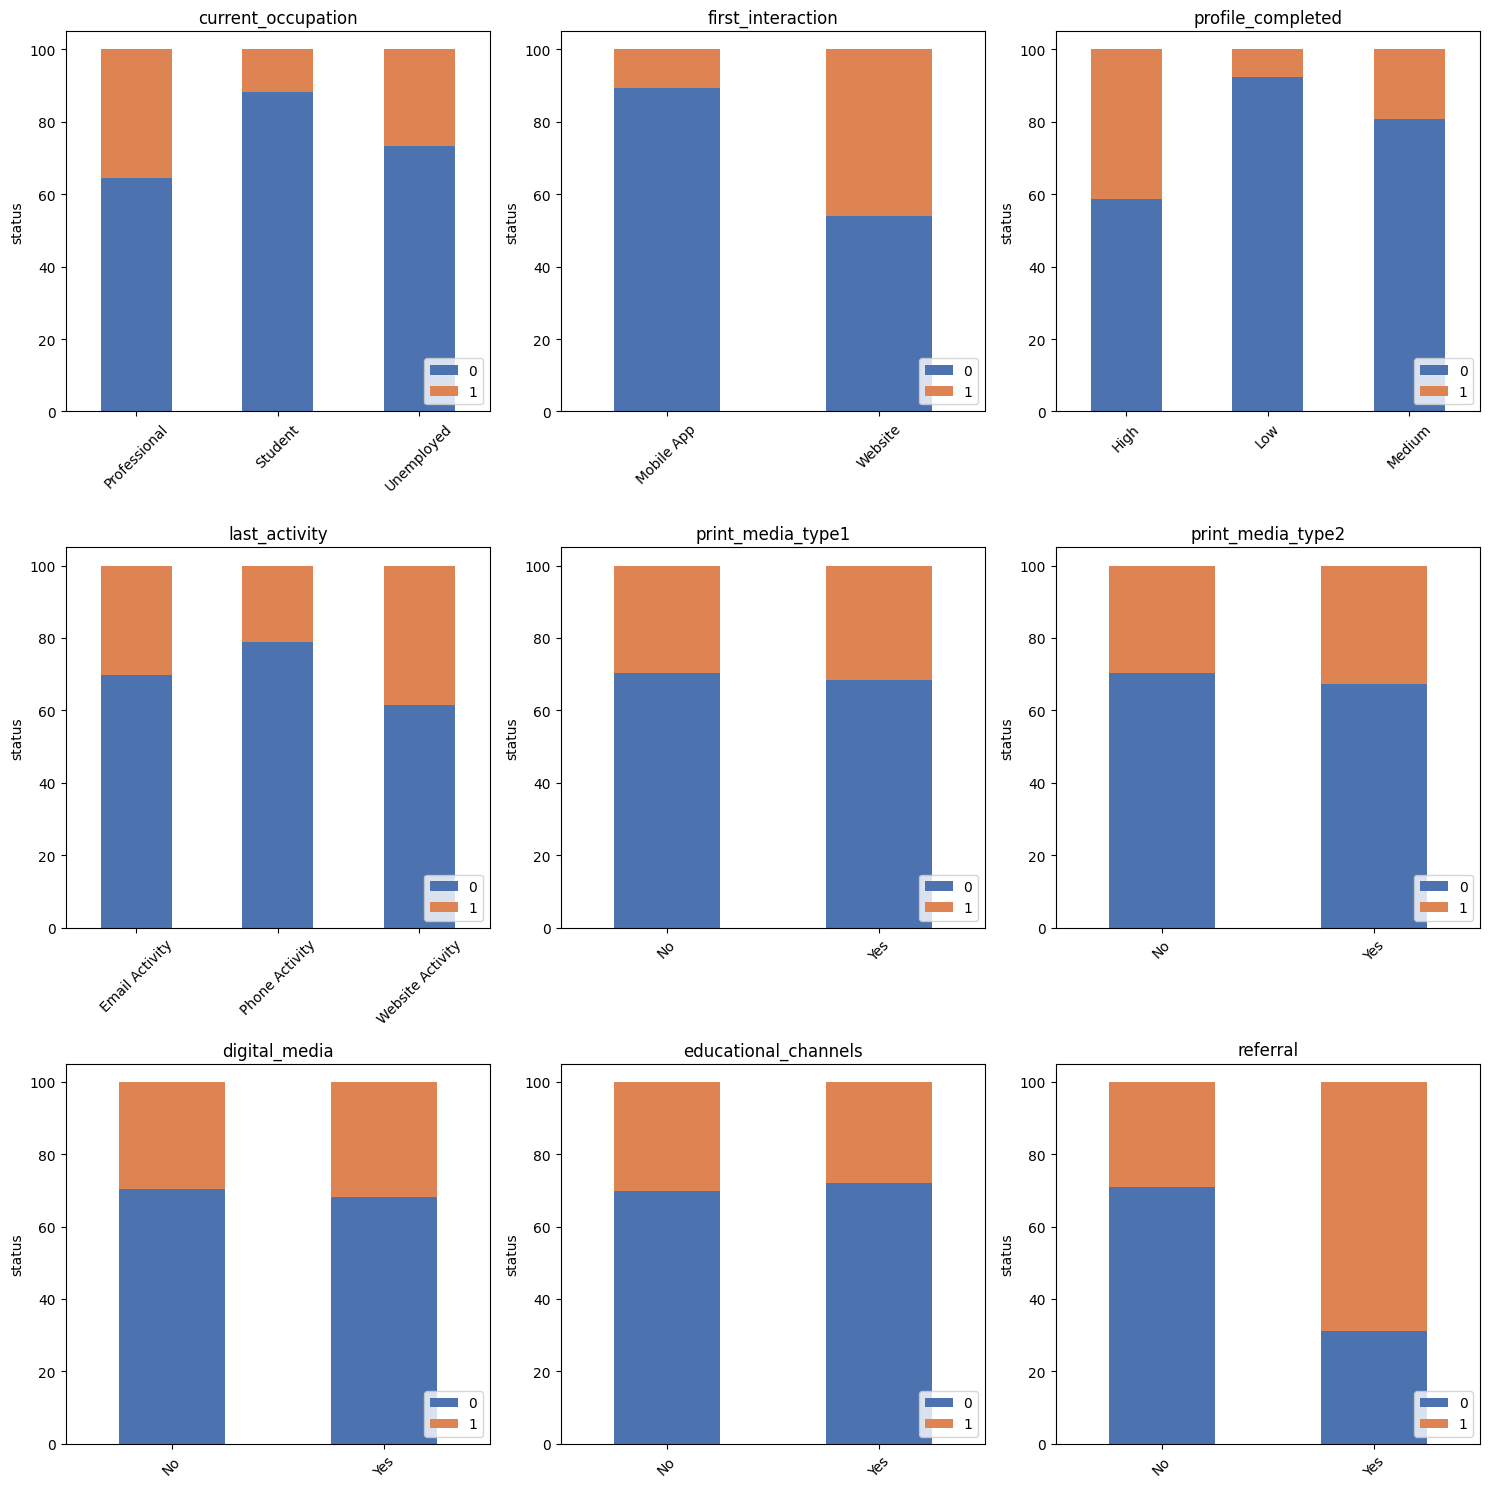

In [15]:
# Define the number of rows and columns for subplots
num_cols = 3
num_rows = (len(categorical_cols) + 2) // num_cols


# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to iterate over all subplots
axes = axes.flatten()

# Loop over categorical columns and plot stacked barplots
for i, col in enumerate(categorical_cols):
    ax = axes[i]  # Get the current axis
    stacked_barplot(df, col, 'status', figsize=(8, 4), palette=palette, ax=ax)  # Plot the stacked barplot
    ax.set_title(col)  # Set the title for the subplot
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove any extra empty subplots
for i in range(len(categorical_cols), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<Axes: title={'center': 'exposure_count'}, xlabel='exposure_count', ylabel='status'>

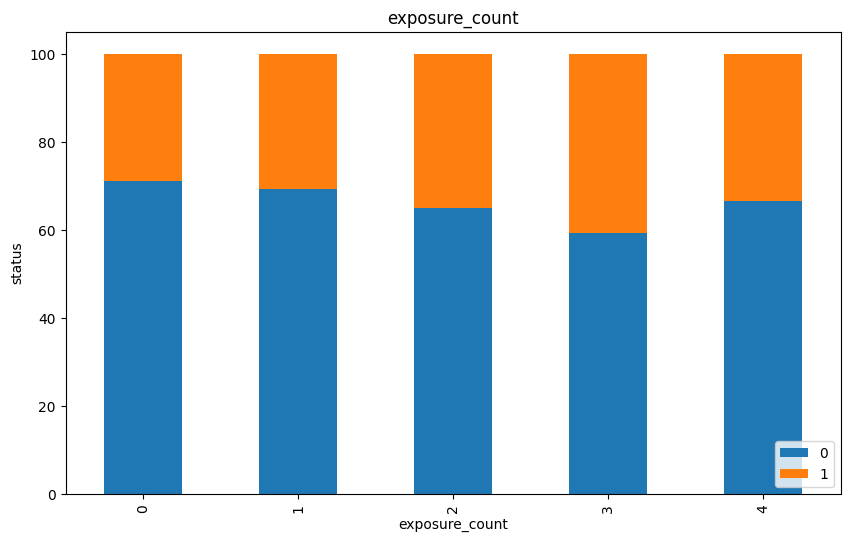

In [16]:
# Define the exposure columns
exposure = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels','referral']
df_temp = df.copy()
# Replace 'Yes' with 1 and 'No' with 0 in the exposure columns
df_temp[exposure] = df_temp[exposure].replace({'Yes': 1, 'No': 0})

# Calculate the sum of exposures for each lead and assign it to a new column 'exposure_count'
df_temp['exposure_count'] = df_temp[exposure].sum(axis=1)

# Display the first few rows of the DataFrame to check accuracy
df.sample(10)

stacked_barplot(df_temp, var= 'exposure_count',res='status')


####Observations

1. Current Occupation:

  There is a notable difference in lead status across different occupations. Professionals have the highest conversion rate, followed by unemployed individuals, and then students. This suggests that tailoring the messaging or approach based on the occupation of the lead could be beneficial.

2. First Interaction Channel:

  The first interaction channel also appears to have an impact on lead status. Leads coming from the mobile app have a lower conversion rate compared to those from the website. This could indicate that the user experience or functionality of the mobile app needs improvement to better engage leads.

3. Mode of Interaction:
  
  Among the different modes of last interaction, website activity seems to have the highest conversion rate, followed by email activity and then phone activity. This was only the **last** interaction so it is hard to put a lot of weight to this observation. It is much more likely to be a combination of these interactions that results in a successful lead or the timing of a certain interaction. A count the number of ways a lead is exposed seems to show a postitive correlation.

4. Lead Channels:

  Referrals have the highest conversion rate among the various lead channels, followed by educational channels and then print media type 2. This highlights the importance of word-of-mouth and personal recommendations in driving conversions. This was one of sparses pieces in the data however so this effect may be magnified.

5. Profile Completion:

  There is a difference in conversion rates based on profile completion level. Leads with low profile completion rates have the lowest conversion rate, while those with high profile completion rates have the highest conversion rate. This indicates that providing more detailed information about prospects could indeed increase the chances of conversion. There is likely a connection between a leads interest and the amount of information they are willing to share.

### EDA Summary
From an exploration of the data it appears that there is some predictive power, particulaly with features involving age, website interaction, and referrals. Given the feature data types, distributions, and presence of outliers, a model utilizing a decision tree would be the most likely to give the best results.

## Building a Decision Tree model

In [17]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted,digits =4))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [18]:
# Splitting the data into train and test sets
X = df.drop(["status",'ID'], axis=1)
X=pd.get_dummies(X, columns=categorical_cols, drop_first=True)
Y = df.status
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3158, 16)
Shape of test set :  (1354, 16)
Percentage of classes in training set:
status
0   0.702
1   0.298
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.701
1   0.299
Name: proportion, dtype: float64


In [19]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2218
           1     1.0000    1.0000    1.0000       940

    accuracy                         1.0000      3158
   macro avg     1.0000    1.0000    1.0000      3158
weighted avg     1.0000    1.0000    1.0000      3158



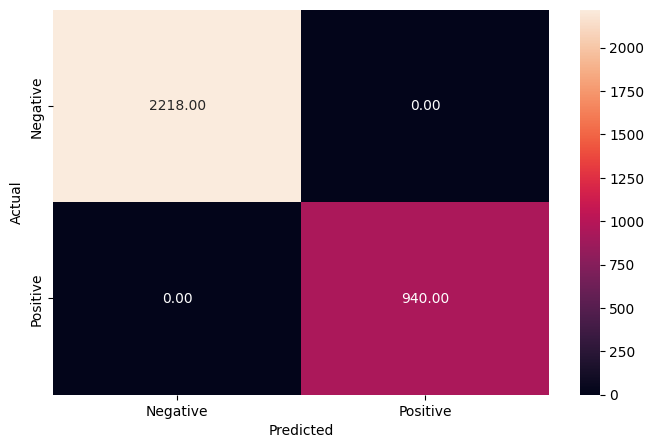

In [20]:
 # Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0     0.8751    0.8862    0.8806       949
           1     0.7252    0.7037    0.7143       405

    accuracy                         0.8316      1354
   macro avg     0.8002    0.7949    0.7975      1354
weighted avg     0.8303    0.8316    0.8309      1354



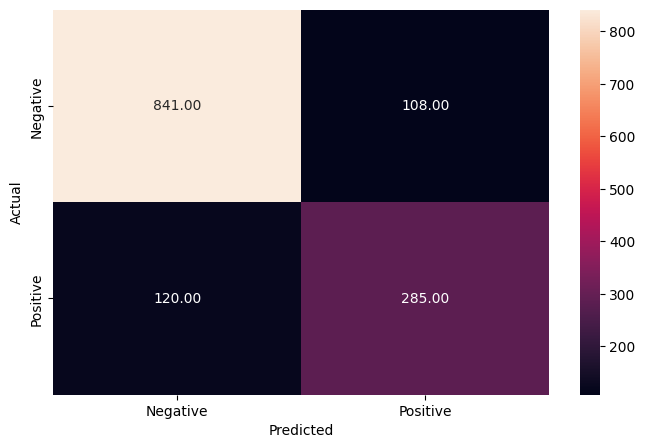

In [21]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

####Observations
The model appears to be overfit, although it performed surprisingly well on the test data, even with a full tree. Parameter tuning should help create a more robust tree model.

Recall will likely be the preferred metric to ensure every promising lead is converted. Additionally, F1-score will be examined to determine if a comparable model can be developed while also avoiding resource waste.

## Decision Tree Tuning

In [22]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(criterion='gini',random_state=1, class_weight = {0: 0.3, 1: 0.7}) #applying uneven weight of response

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2,12,2),
    "min_samples_split": [ 5, 10, 30],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=10,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
grid_obj2 = GridSearchCV(estimator, parameters, cv=10,scoring='f1',n_jobs=-1)
grid_obj2 = grid_obj2.fit(X_train, y_train)
# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator2 = grid_obj2.best_estimator_
# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)
estimator2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=6,
                       min_samples_split=5, random_state=1)

              precision    recall  f1-score   support

           0     0.9476    0.7665    0.8475      2218
           1     0.6202    0.9000    0.7344       940

    accuracy                         0.8062      3158
   macro avg     0.7839    0.8332    0.7909      3158
weighted avg     0.8502    0.8062    0.8138      3158



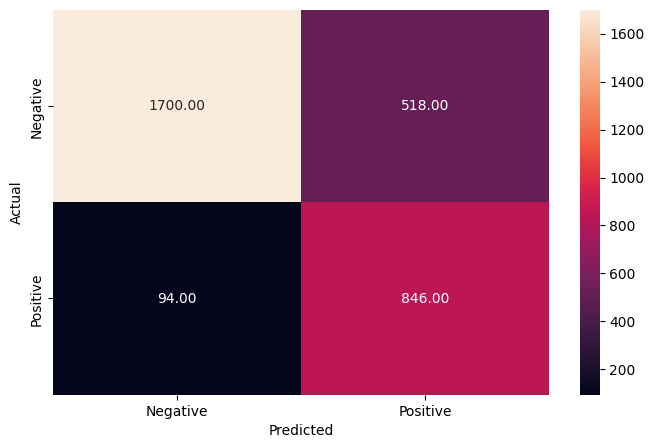

              precision    recall  f1-score   support

           0     0.9432    0.8454    0.8916      2218
           1     0.7068    0.8798    0.7839       940

    accuracy                         0.8556      3158
   macro avg     0.8250    0.8626    0.8377      3158
weighted avg     0.8728    0.8556    0.8595      3158



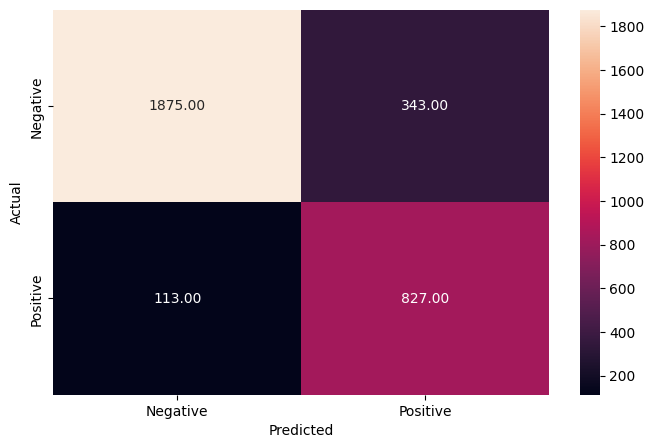

In [23]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)
dt_tuned2 = estimator2.predict(X_train)
metrics_score(y_train,dt_tuned2)

              precision    recall  f1-score   support

           0     0.9485    0.8145    0.8764       949
           1     0.6735    0.8963    0.7691       405

    accuracy                         0.8390      1354
   macro avg     0.8110    0.8554    0.8227      1354
weighted avg     0.8662    0.8390    0.8443      1354



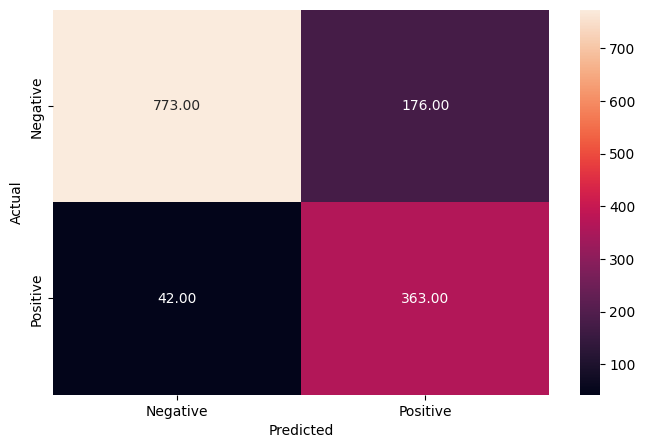

              precision    recall  f1-score   support

           0     0.9261    0.8577    0.8906       949
           1     0.7158    0.8395    0.7727       405

    accuracy                         0.8523      1354
   macro avg     0.8209    0.8486    0.8317      1354
weighted avg     0.8632    0.8523    0.8553      1354



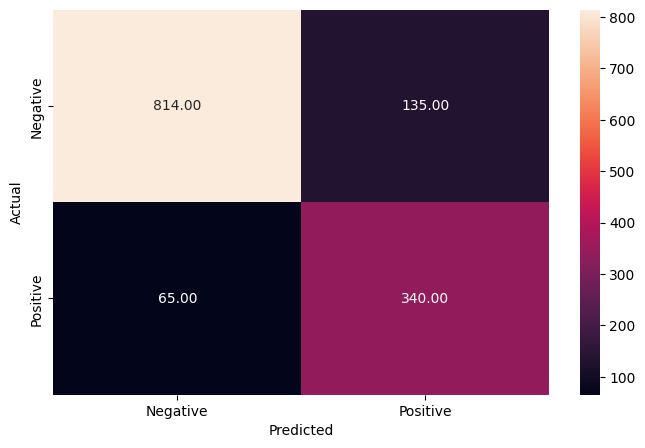

In [24]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)
y_pred_tuned2 = estimator2.predict(X_test)
metrics_score(y_test,y_pred_tuned2)

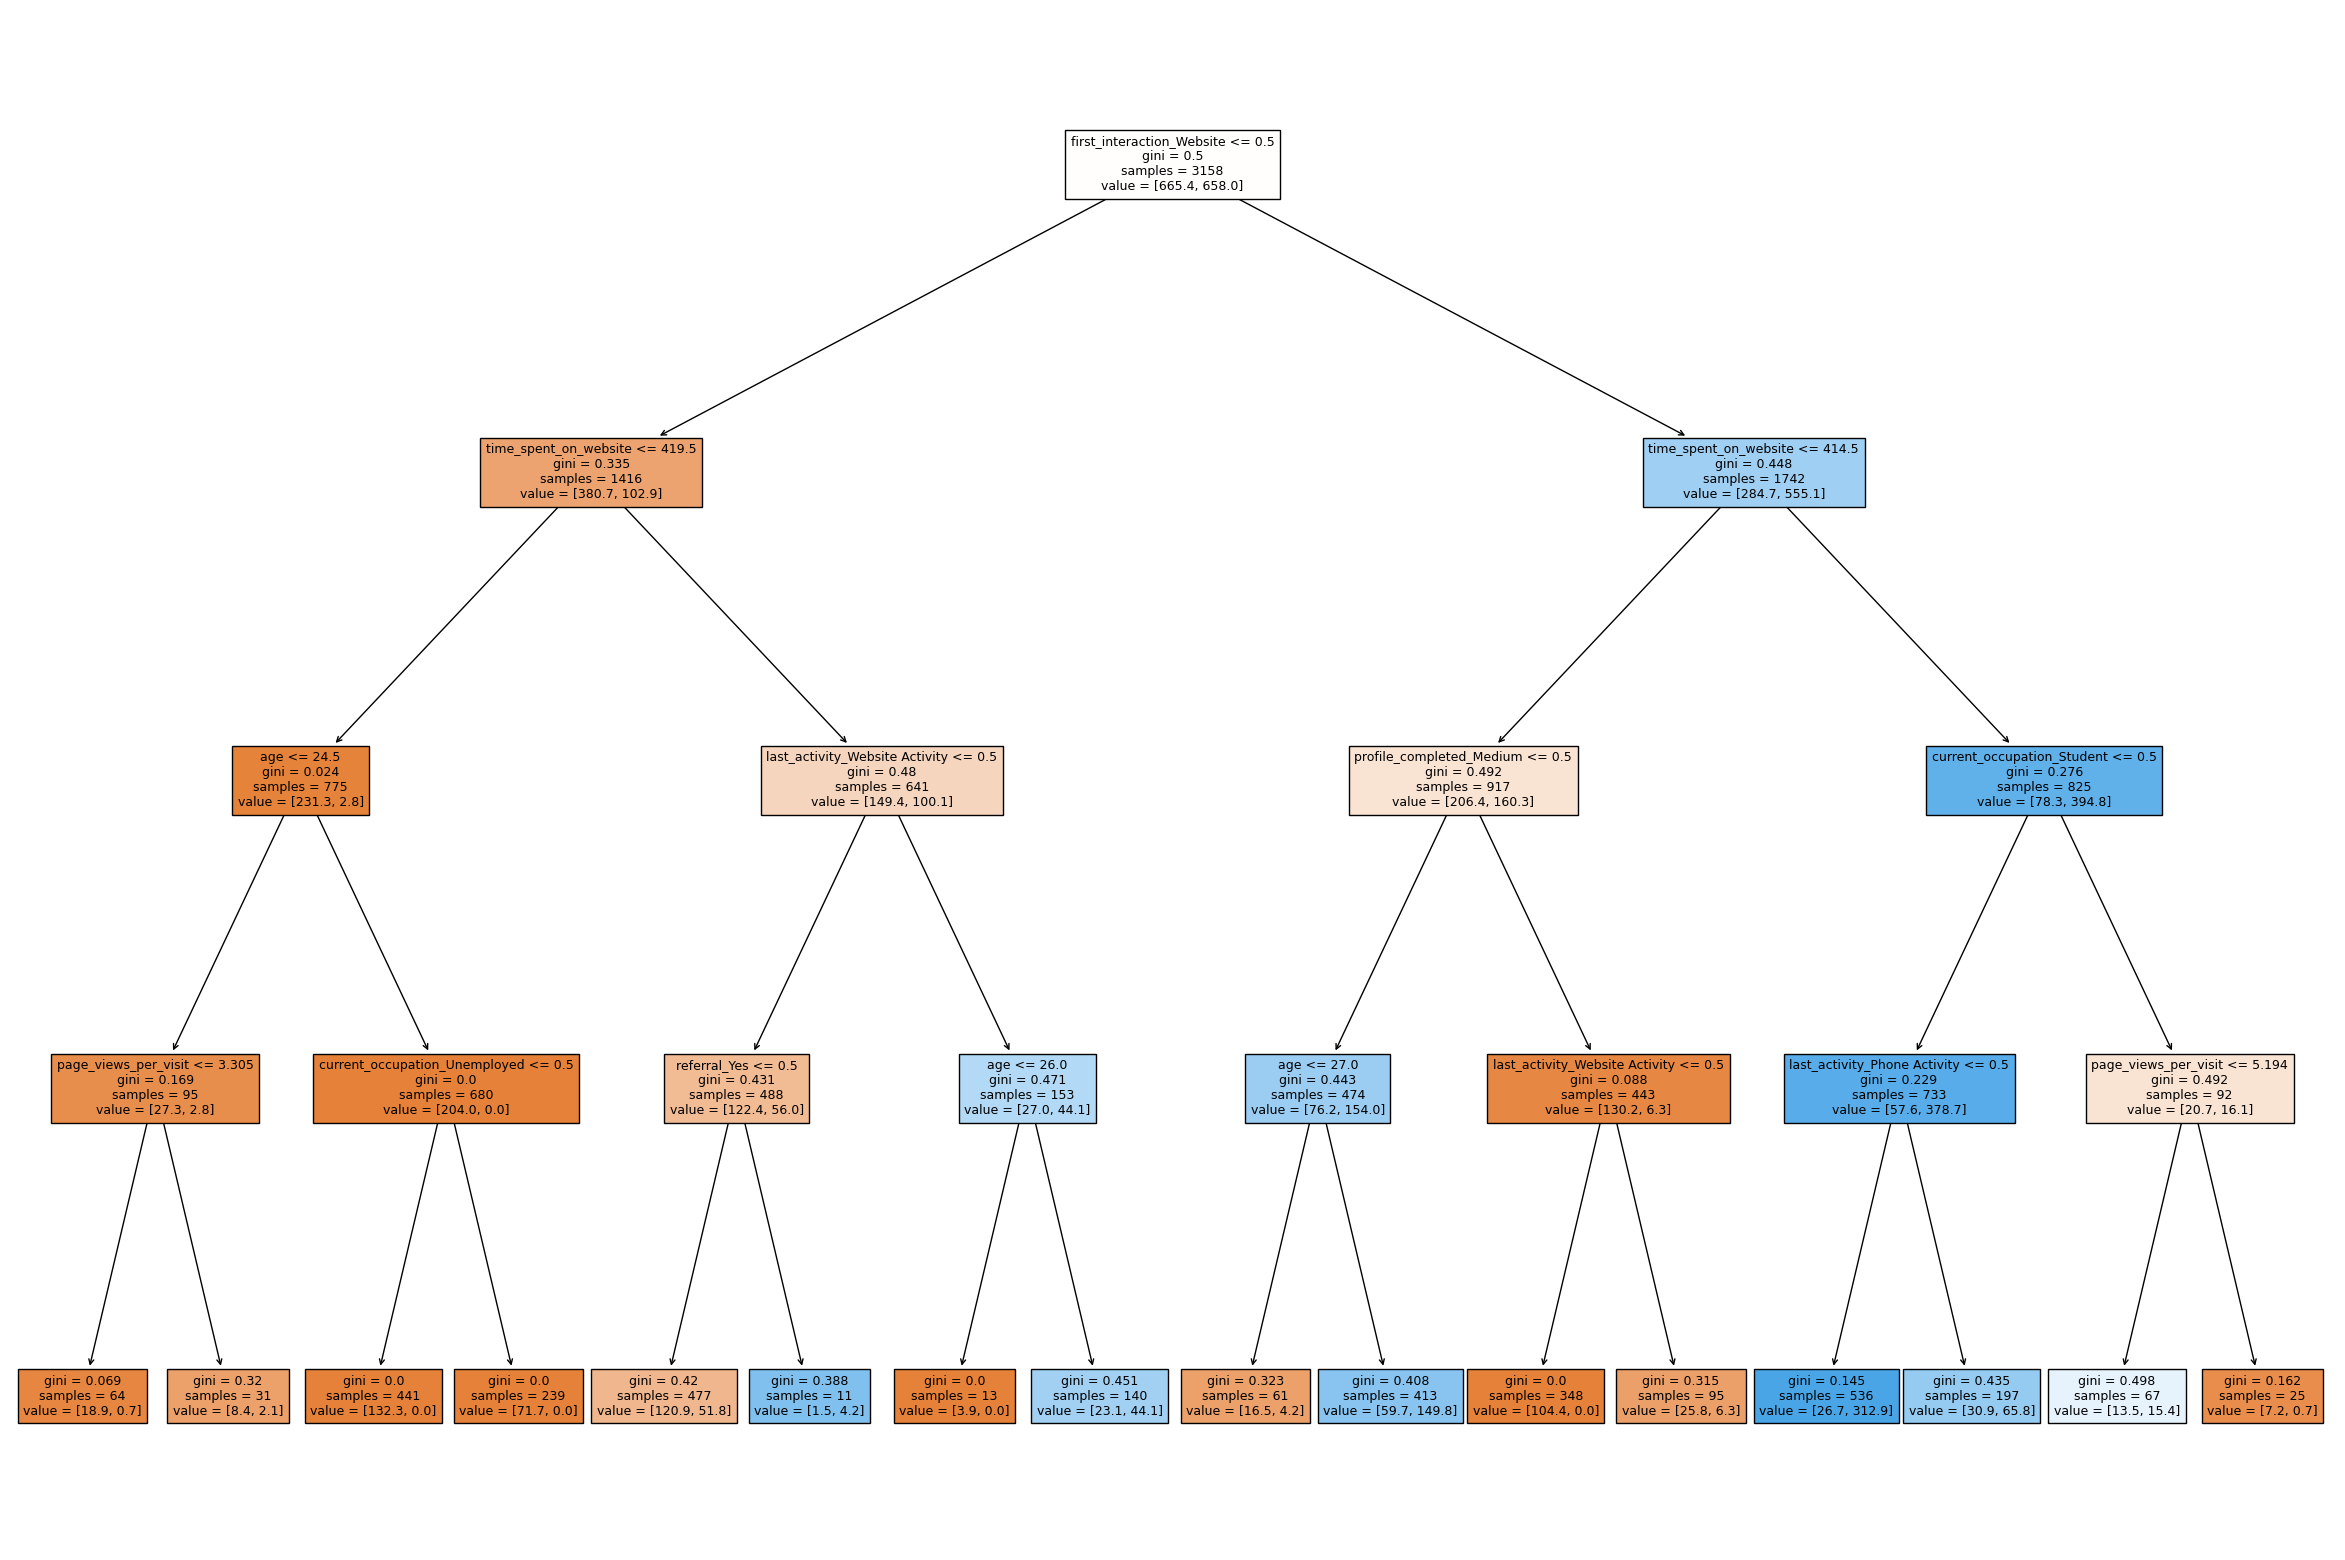

In [25]:
feature_names = list(X_train.columns)
plt.figure(figsize=(30, 20))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

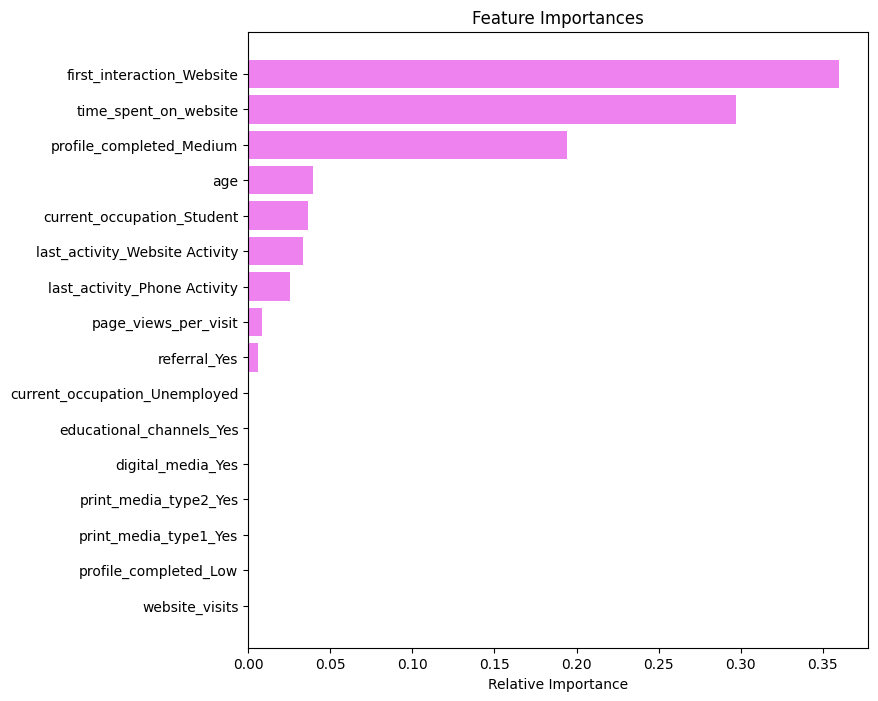

In [26]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
After tuning the maximum depth, criterion, class weight, and minimum samples per split, the simple decision tree performs exceptionally well on recall. The model only misclassifies 42 out of 405 positive leads and 176 out of 949 false positives. This is 23 fewer misclassifications than using the F1 score, which reduced the false positive leads by 41 (135 out of 949).
The feature importance shows many of the same features we identified in EDA as potentially useful. The top features being 'first interaction', 'time on website', 'profile completion', and age.  

### Dropping Unimportant Features

Bottom Features to be eliminated:
['website_visits', 'profile_completed_Low', 'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes', 'educational_channels_Yes', 'current_occupation_Unemployed']


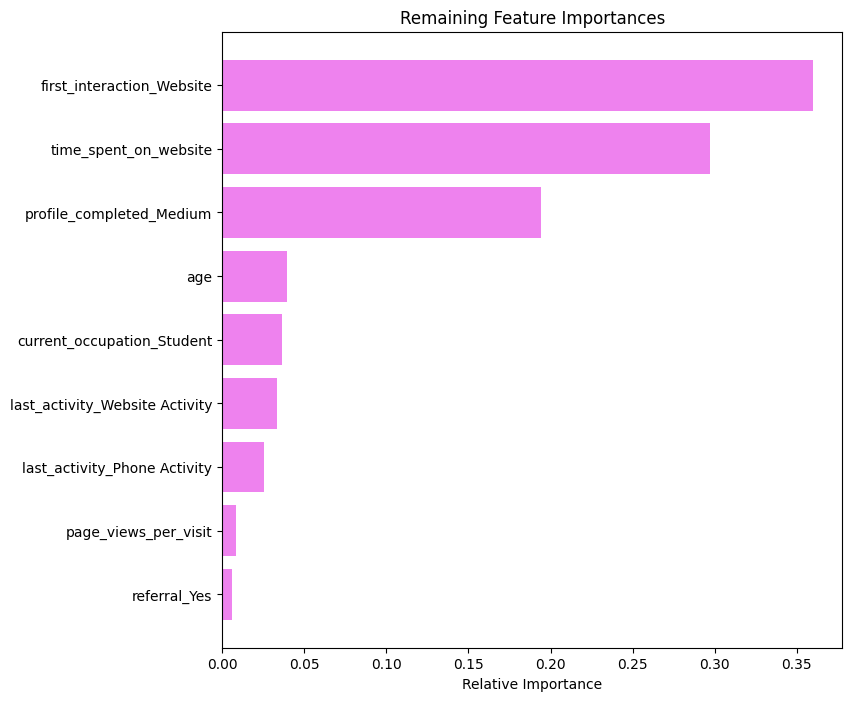

In [27]:
#Identify the bottom 7 features
bottom_indices = indices[:7]
bottom_features = [feature_names[i] for i in bottom_indices]

# Print the bottom features
print("Bottom Features to be eliminated:")
print(bottom_features)

# Filter out the bottom features
important_indices = [i for i in range(len(feature_names)) if i not in bottom_indices]
important_importances = importances[important_indices]
important_features = [feature_names[i] for i in important_indices]

# Sort the remaining important features by their importances
sorted_important_indices = np.argsort(important_importances)
sorted_important_features = [important_features[i] for i in sorted_important_indices]
sorted_important_importances = important_importances[sorted_important_indices]

# Visualize the remaining important features
plt.figure(figsize=(8, 8))
plt.title("Remaining Feature Importances")
plt.barh(range(len(sorted_important_indices)), sorted_important_importances, color="violet", align="center")
plt.yticks(range(len(sorted_important_indices)), [sorted_important_features[i] for i in range(len(sorted_important_indices))])
plt.xlabel("Relative Importance")
plt.show()


### Decision Tree Tuning with Important Features

In [28]:
X_important = X_train[important_features]
X_test_important = X_test[important_features]
# Choose the type of classifier.
estimator = DecisionTreeClassifier(criterion='gini',random_state=1, class_weight = {0: 0.3, 1: 0.7}) #applying uneven weight of response

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2,12,2),
    "min_samples_split": [ 5, 10, 30],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=10,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_important, y_train)
grid_obj2 = GridSearchCV(estimator, parameters, cv=10,scoring='f1',n_jobs=-1)
grid_obj2 = grid_obj2.fit(X_important, y_train)
# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator2 = grid_obj2.best_estimator_
# Fit the best algorithm to the data.
estimator.fit(X_important, y_train)
estimator2.fit(X_important, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=6,
                       min_samples_split=5, random_state=1)

              precision    recall  f1-score   support

           0     0.9476    0.7665    0.8475      2218
           1     0.6202    0.9000    0.7344       940

    accuracy                         0.8062      3158
   macro avg     0.7839    0.8332    0.7909      3158
weighted avg     0.8502    0.8062    0.8138      3158



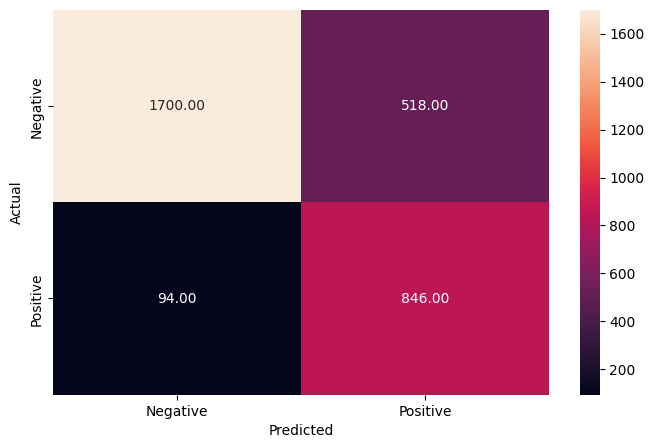

              precision    recall  f1-score   support

           0     0.9483    0.8183    0.8785      2218
           1     0.6760    0.8947    0.7701       940

    accuracy                         0.8410      3158
   macro avg     0.8122    0.8565    0.8243      3158
weighted avg     0.8672    0.8410    0.8463      3158



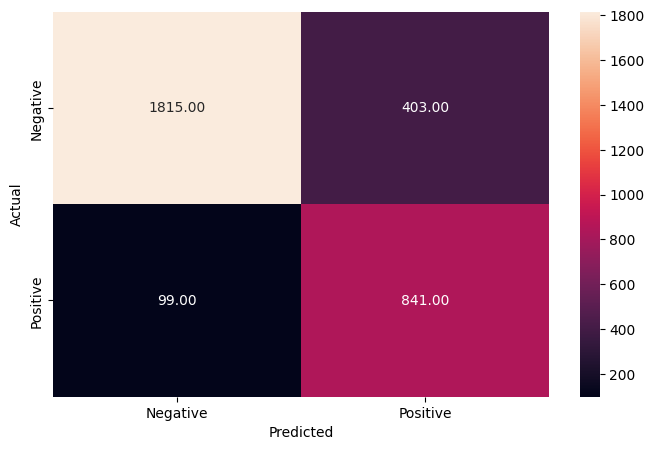

In [29]:
# Checking performance on the training dataset
dt_tuned_imp = estimator.predict(X_important)
metrics_score(y_train,dt_tuned_imp)
dt_tuned2_imp = estimator2.predict(X_important)
metrics_score(y_train,dt_tuned2_imp)

              precision    recall  f1-score   support

           0     0.9485    0.8145    0.8764       949
           1     0.6735    0.8963    0.7691       405

    accuracy                         0.8390      1354
   macro avg     0.8110    0.8554    0.8227      1354
weighted avg     0.8662    0.8390    0.8443      1354



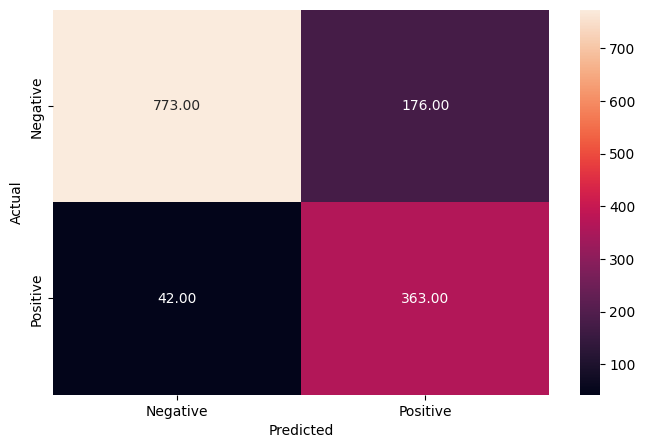

              precision    recall  f1-score   support

           0     0.9337    0.8462    0.8878       949
           1     0.7045    0.8593    0.7742       405

    accuracy                         0.8501      1354
   macro avg     0.8191    0.8527    0.8310      1354
weighted avg     0.8651    0.8501    0.8538      1354



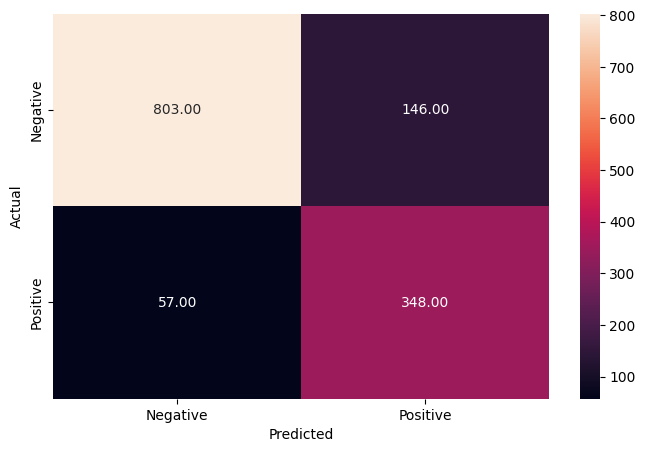

In [30]:
# Checking performance on the test dataset
y_pred_tuned_imp = estimator.predict(X_test_important)
metrics_score(y_test,y_pred_tuned_imp)
y_pred_tuned2_imp = estimator2.predict(X_test_important)
metrics_score(y_test,y_pred_tuned2_imp)

### Observations

Dropping features had little to no impact on the model built with recall. The model built using f1 score improved slightly in recall but dropped slightly in precision.

## Building a Random Forest model

In [44]:
rf_estimator = RandomForestClassifier(criterion='entropy', class_weight = {0: 0.3, 1: 0.7},random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       random_state=1)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2218
           1     1.0000    1.0000    1.0000       940

    accuracy                         1.0000      3158
   macro avg     1.0000    1.0000    1.0000      3158
weighted avg     1.0000    1.0000    1.0000      3158



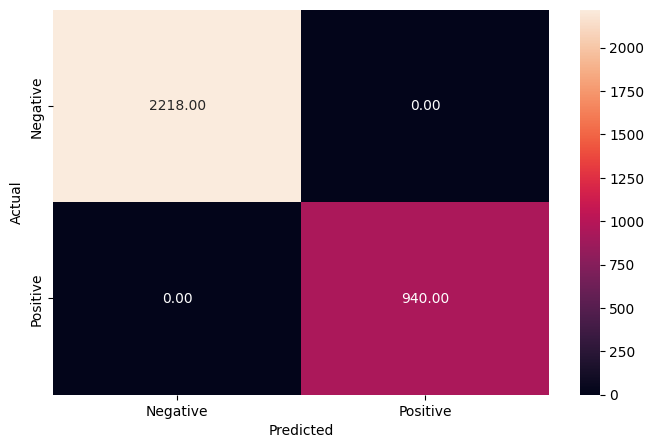

In [45]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0     0.8771    0.9399    0.9074       949
           1     0.8309    0.6914    0.7547       405

    accuracy                         0.8656      1354
   macro avg     0.8540    0.8156    0.8311      1354
weighted avg     0.8633    0.8656    0.8617      1354



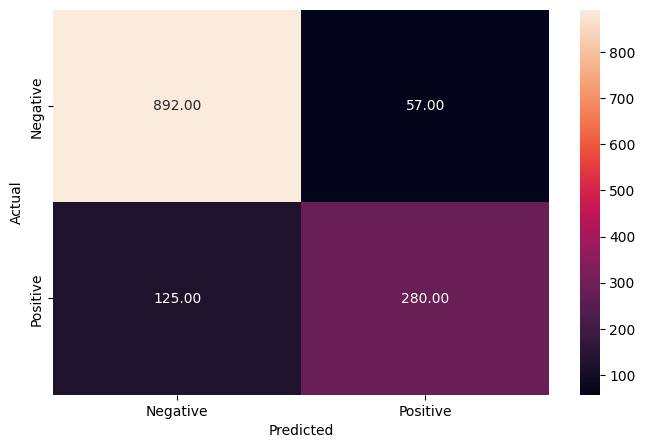

In [46]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

## Random Forest Parameter Tuning

In [34]:
# Choose the type of classifier.
estimator = RandomForestClassifier(criterion='entropy',random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=10, scoring='recall', n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=110, random_state=1)

              precision    recall  f1-score   support

           0     0.9203    0.8641    0.8913       949
           1     0.7214    0.8247    0.7696       405

    accuracy                         0.8523      1354
   macro avg     0.8208    0.8444    0.8304      1354
weighted avg     0.8608    0.8523    0.8549      1354



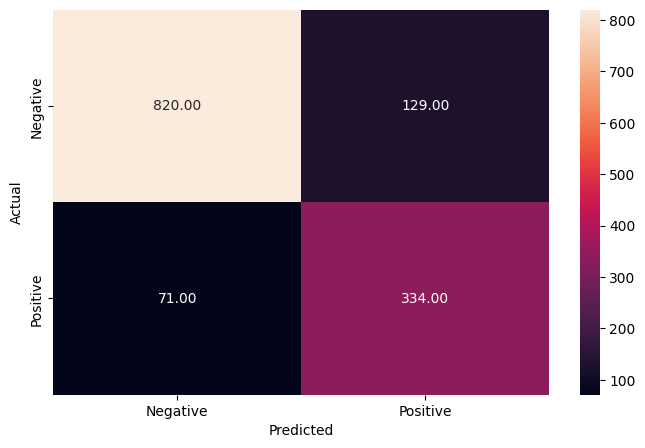

In [35]:
y_pred_test_rf = estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [36]:
# Choose the type of classifier.
estimator = RandomForestClassifier(criterion='entropy',random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=10, scoring='f1', n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=120, random_state=1)

              precision    recall  f1-score   support

           0     0.9193    0.8641    0.8908       949
           1     0.7208    0.8222    0.7682       405

    accuracy                         0.8516      1354
   macro avg     0.8200    0.8431    0.8295      1354
weighted avg     0.8599    0.8516    0.8541      1354



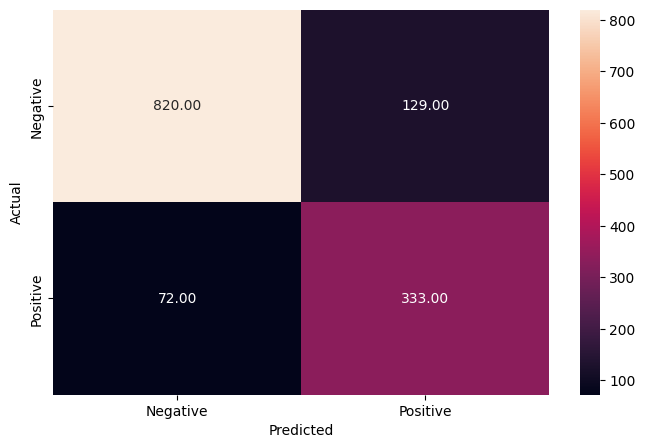

In [37]:
y_pred_test_rf = estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

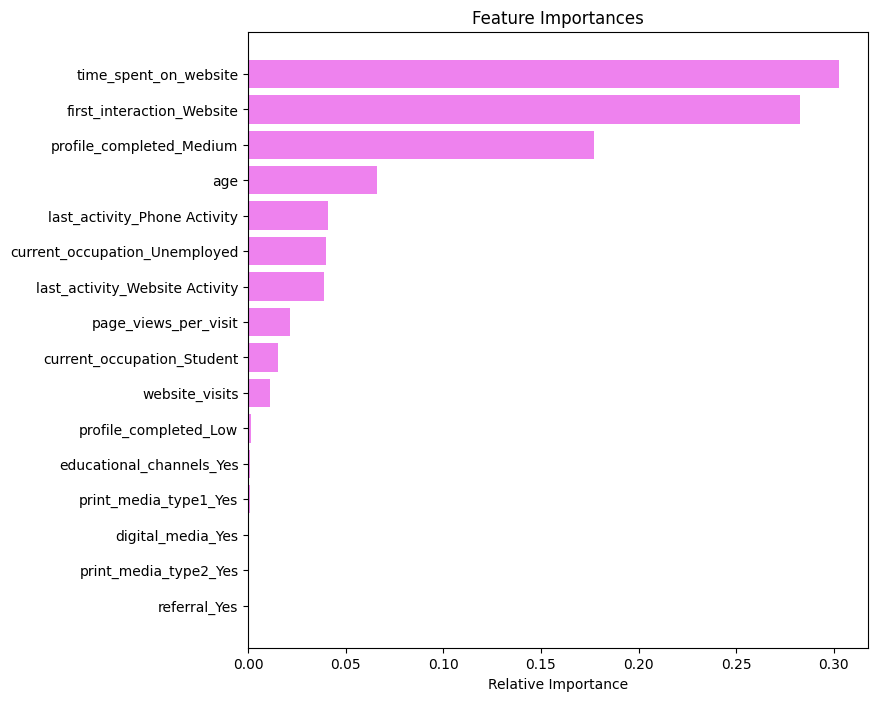

In [39]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations
Upon tuning the random forest model, it's noteworthy that the top features remain mostly the same as those identified by the simple decision tree. Surprisingly, the decision tree outperforms the random forest. This outcome is likely attributed to the relatively small number of features, particularly those with significant information gain, allowing the decision tree to effectively identify interactions with the response variable.

### Dropping Unimportant Features


Bottom Features to be eliminated:
['referral_Yes', 'print_media_type2_Yes', 'digital_media_Yes', 'print_media_type1_Yes', 'educational_channels_Yes', 'profile_completed_Low', 'website_visits']


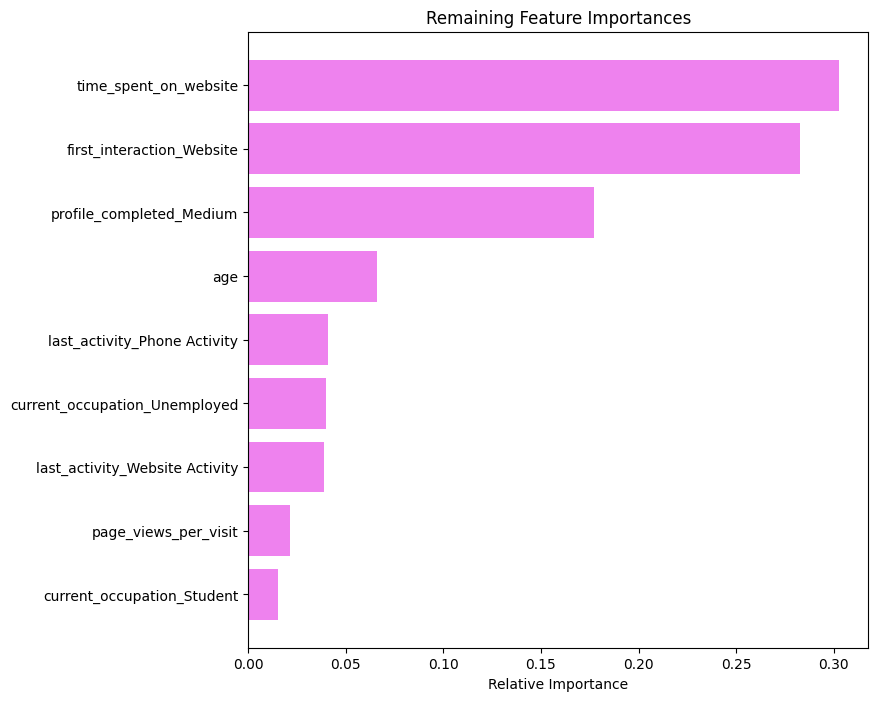

In [48]:
#Identify the bottom 7 features
bottom_indices = indices[:7]
bottom_features = [feature_names[i] for i in bottom_indices]

# Print the bottom features
print("Bottom Features to be eliminated:")
print(bottom_features)

# Filter out the bottom features
important_indices = [i for i in range(len(feature_names)) if i not in bottom_indices]
important_importances = importances[important_indices]
important_features = [feature_names[i] for i in important_indices]

# Sort the remaining important features by their importances
sorted_important_indices = np.argsort(important_importances)
sorted_important_features = [important_features[i] for i in sorted_important_indices]
sorted_important_importances = important_importances[sorted_important_indices]

# Visualize the remaining important features
plt.figure(figsize=(8, 8))
plt.title("Remaining Feature Importances")
plt.barh(range(len(sorted_important_indices)), sorted_important_importances, color="violet", align="center")
plt.yticks(range(len(sorted_important_indices)), [sorted_important_features[i] for i in range(len(sorted_important_indices))])
plt.xlabel("Relative Importance")
plt.show()



In [52]:
X_important = X_train[important_features]
X_test_important = X_test[important_features]
# Choose the type of classifier.
estimator = RandomForestClassifier(criterion='gini',random_state=1, class_weight = {0: 0.3, 1: 0.7}) #applying uneven weight of response

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1]
             }
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_important, y_train)
grid_obj2 = GridSearchCV(estimator, parameters, cv=5,scoring='f1',n_jobs=-1)
grid_obj2 = grid_obj2.fit(X_important, y_train)
# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator2 = grid_obj2.best_estimator_
# Fit the best algorithm to the data.
estimator.fit(X_important, y_train)
estimator2.fit(X_important, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=6,
                       max_features=0.8, max_samples=0.9, min_samples_leaf=20,
                       n_estimators=120, random_state=1)

              precision    recall  f1-score   support

           0     0.9336    0.8436    0.8863      2218
           1     0.6993    0.8585    0.7708       940

    accuracy                         0.8480      3158
   macro avg     0.8165    0.8510    0.8285      3158
weighted avg     0.8639    0.8480    0.8519      3158



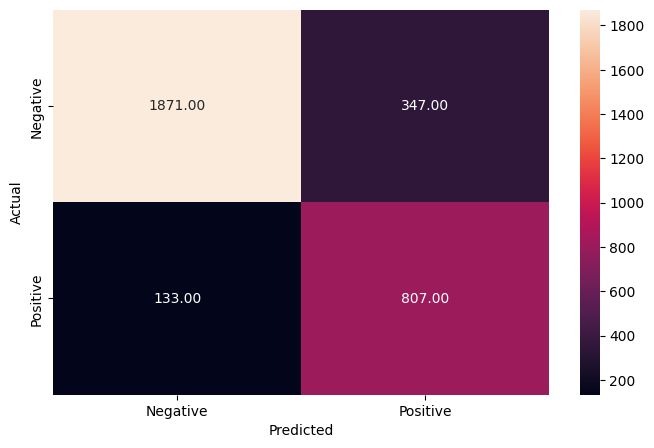

              precision    recall  f1-score   support

           0     0.9336    0.8436    0.8863      2218
           1     0.6993    0.8585    0.7708       940

    accuracy                         0.8480      3158
   macro avg     0.8165    0.8510    0.8285      3158
weighted avg     0.8639    0.8480    0.8519      3158



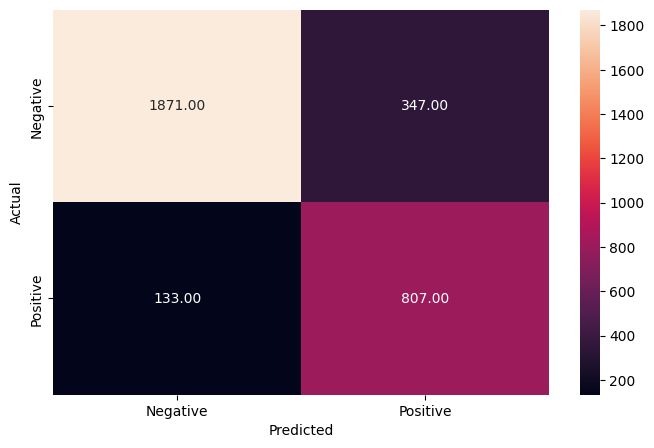

In [55]:
# Checking performance on the training dataset
dt_tuned_imp = estimator.predict(X_important)
metrics_score(y_train,dt_tuned_imp)
dt_tuned2_imp = estimator2.predict(X_important)
metrics_score(y_train,dt_tuned2_imp)

              precision    recall  f1-score   support

           0     0.9139    0.8609    0.8866       949
           1     0.7130    0.8099    0.7584       405

    accuracy                         0.8456      1354
   macro avg     0.8135    0.8354    0.8225      1354
weighted avg     0.8538    0.8456    0.8482      1354



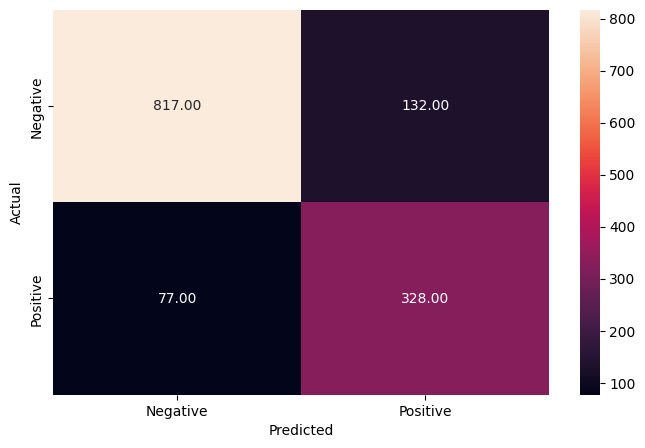

              precision    recall  f1-score   support

           0     0.9139    0.8609    0.8866       949
           1     0.7130    0.8099    0.7584       405

    accuracy                         0.8456      1354
   macro avg     0.8135    0.8354    0.8225      1354
weighted avg     0.8538    0.8456    0.8482      1354



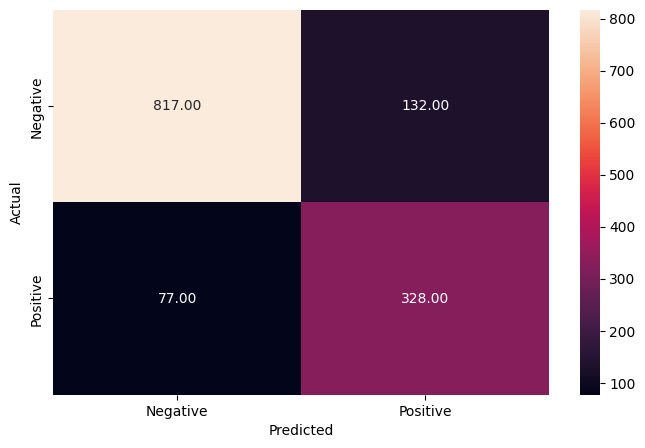

In [56]:
# Checking performance on the test dataset
y_pred_tuned_imp = estimator.predict(X_test_important)
metrics_score(y_test,y_pred_tuned_imp)
y_pred_tuned2_imp = estimator2.predict(X_test_important)
metrics_score(y_test,y_pred_tuned2_imp)

## Actionable Insights and Recommendations

The decision tree model, utilizing important features, emerges as the optimal choice for addressing this problem. Not only does it demonstrate exceptional predictive capabilities, but it also offers simplicity and transparency, making it an intuitive decision-making tool.

### Key Influencing Factors

**Website Interaction**  
Website interaction is identified as the pivotal factor influencing lead conversion and should continue to be capitalized on.

**Time Spent on Website and Profile Completion**  
The time spent on the website and the completion of profiles are significant features. Strategies to encourage profile completion through website activity are advisable. One potential tactic could involve introducing a simple popup offering access to the brochure after a predetermined duration spent on the website, provided important profile information is given.

**Age as a Significant Feature**  
Given the significance of age as a feature, implementing an age confirmation wall upon website access or integrating it as a question in the popup after a brief duration could be beneficial.

### Advertising Mediums and Cost Analysis

**Impact of Various Advertising Mediums**  
Further exploration into the impact of various advertising mediums is recommended. Observation suggests that increased exposure to Extraalearn across different media platforms correlates with a higher likelihood of lead conversion. However, several print features appear to have little impact on conversion.

**Cost Analysis**  
A cost analysis is recommended for future advertising campaigns. This analysis would help in understanding the cost-effectiveness of various advertising mediums, ensuring that resources are allocated to the most impactful channels.


By focusing on these key areas, you can enhance lead conversion rates and optimize your marketing strategies for better results.